# Telco Customer Churn Problem

Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

___________________________________________________________________________________________________

Content

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

__________________________________________________________________________________________________________________________


About this file
Telcom Customer Churn
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

____________________________________



Note:

 Before Starting Working ther is some Pasic Steps we Should Aplly First
    
    1- data wrangling
    2- data cleansing
    3- data preparation
    4-
    5-

### Import Libarary

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from tensorflow import keras
import tensorflow as tf

### Read CSV File Data

In [2]:
df=pd.read_csv('Data/Telco-Customer-Churn.csv');

In [3]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3433,1698-XFZCI,Male,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,107.75,6521.9,No
1803,2773-MADBQ,Female,0,No,No,36,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Mailed check,53.10,1901.25,No
3827,6870-ECSHE,Female,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.45,34.8,No
578,6522-YRBXD,Male,1,Yes,No,35,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,94.55,3365.4,No
3847,8439-LTUGF,Male,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.00,198.6,No
6059,7325-ENZFI,Female,0,No,No,39,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),40.30,1630.4,No
5534,7964-VEXDG,Male,0,No,Yes,21,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Electronic check,80.35,1747.2,No
4316,8413-YNHNV,Male,0,No,No,69,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,90.65,6322.1,No
5920,9355-NPPFS,Female,1,No,No,26,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,78.80,2006.1,No
3726,1965-DDBWU,Male,0,No,No,16,Yes,Yes,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),89.05,1448.6,Yes


In [4]:
# first We need to drop customer ID Because it is not useful info in our case

df.drop('customerID' ,axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [8]:
#pd.to_numeric(df.TotalCharges)

In [9]:
pd.to_numeric(df.TotalCharges ,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges ,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df[pd.to_numeric(df.TotalCharges ,errors='coerce').isnull()].shape

(11, 20)

In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488]['TotalCharges']

' '

In [14]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [15]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [16]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

E:\program files\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df1.TotalCharges.dtypes

dtype('float64')

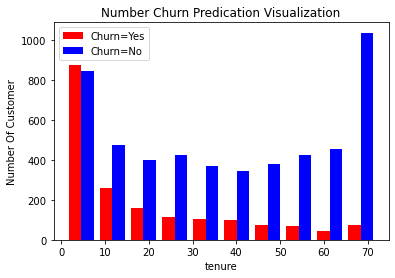

In [18]:
tenure_Churn_No = df1[df1.Churn=='No'].tenure
tenure_Churn_Yes = df1[df1.Churn=='Yes'].tenure


plt.xlabel("tenure")
plt.ylabel("Number Of Customer")
plt.title("Number Churn Predication Visualization")

plt.hist([tenure_Churn_Yes,tenure_Churn_No] ,color=['red','blue'], label=['Churn=Yes','Churn=No'])
plt.legend()

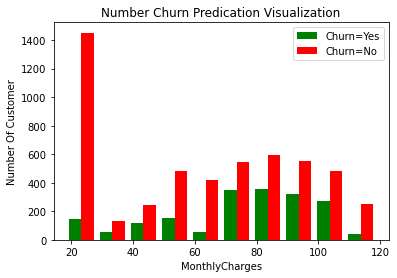

In [19]:
tenure_Churn_No = df1[df1.Churn=='No'].MonthlyCharges
tenure_Churn_Yes = df1[df1.Churn=='Yes'].MonthlyCharges


plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customer")
plt.title("Number Churn Predication Visualization")

plt.hist([tenure_Churn_Yes,tenure_Churn_No] ,color=['green','red'], label=['Churn=Yes','Churn=No'])
plt.legend()

In [20]:
def print_unique_col_Values(df):
    for column in df:
        if df[column].dtype=='object':
            print( f'{column} :{df[column].unique()}')

In [21]:
print_unique_col_Values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No phone service' 'No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes' 'No internet service']
OnlineBackup :['Yes' 'No' 'No internet service']
DeviceProtection :['No' 'Yes' 'No internet service']
TechSupport :['No' 'Yes' 'No internet service']
StreamingTV :['No' 'Yes' 'No internet service']
StreamingMovies :['No' 'Yes' 'No internet service']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [22]:
#wee need to 
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

E:\program files\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
print_unique_col_Values(df1)

gender :['Female' 'Male']
Partner :['Yes' 'No']
Dependents :['No' 'Yes']
PhoneService :['No' 'Yes']
MultipleLines :['No' 'Yes']
InternetService :['DSL' 'Fiber optic' 'No']
OnlineSecurity :['No' 'Yes']
OnlineBackup :['Yes' 'No']
DeviceProtection :['No' 'Yes']
TechSupport :['No' 'Yes']
StreamingTV :['No' 'Yes']
StreamingMovies :['No' 'Yes']
Contract :['Month-to-month' 'One year' 'Two year']
PaperlessBilling :['Yes' 'No']
PaymentMethod :['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

E:\program files\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1742,1,0,0,0,2,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
5958,0,0,1,0,11,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2948,0,1,1,0,41,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
5378,1,0,1,1,58,1,1,1,0,1,...,1,0,0,0,0,1,0,0,0,1
3909,0,0,0,0,11,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
# Scaling Is Very Important in Deep Learnigg

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [33]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [39]:
len(X_train)

5625

In [40]:
len(X_test)

1407

In [36]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [37]:
len(X_train.columns)

26

Build a model (ANN) in tensorflow/keras

In [38]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 2s 5ms/step - loss: 0.4918 - accuracy: 0.7598
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4286 - accuracy: 0.7941
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4188 - accuracy: 0.7980
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8055: 0s - loss: 0.4131 - accuracy: 
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4111 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4101 - accuracy: 0.8076
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4076 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4076 - accuracy: 0.8080
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4057 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 1s 

176/176 [==============================] - 1s 5ms/step - loss: 0.3583 - accuracy: 0.8304
Epoch 81/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3583 - accuracy: 0.8329
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3574 - accuracy: 0.8315
Epoch 83/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3577 - accuracy: 0.8315
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3565 - accuracy: 0.8332
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3557 - accuracy: 0.8348
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3556 - accuracy: 0.8348
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3544 - accuracy: 0.8340
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3553 - accuracy: 0.8356
Epoch 89/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3543 - accuracy: 

In [41]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7733


[0.4932508170604706, 0.7732764482498169]

In [42]:
yp = model.predict(X_test)
yp[:5]

array([[0.18240578],
       [0.47784233],
       [0.01096644],
       [0.77403593],
       [0.563204  ]], dtype=float32)

In [43]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [44]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [45]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       999
           1       0.64      0.50      0.56       408

    accuracy                           0.77      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.76      0.77      0.76      1407



Text(69.0, 0.5, 'Truth')

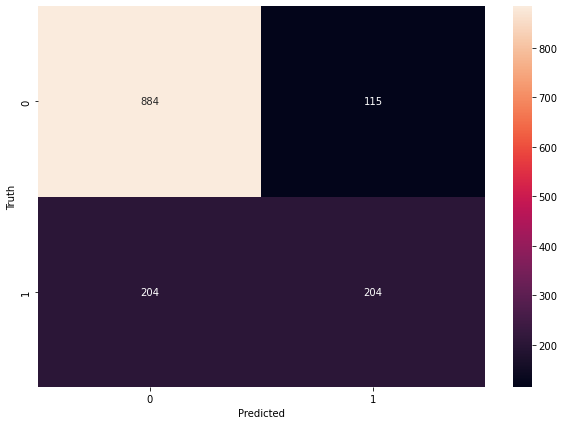

In [47]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Acurcy

In [48]:
round((862+229)/(862+229+137+179),2)

0.78

In [49]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 3s 7ms/step - loss: 0.4933 - accuracy: 0.7733


[0.4932508170604706, 0.7732764482498169]

### Precision for 0 class. i.e. Precision for customers who did not churn

In [50]:
round(862/(862+179),2)

0.83

### Precision for 1 class. i.e. Precision for customers who actually churned



In [51]:
round(229/(229+137),2)

0.63